In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score

In [ ]:
human_scores = pd.DataFrame({
    'Relevance': [80, 90, 90, 85, 85,80, 90, 90, 85, 85],
    'Clarity': [80, 95, 90, 85, 85,80, 95, 90, 85, 85],
    'Correctness': [90, 95, 90, 85, 85,80, 95, 90, 85, 85],
    'StructuredAnswers': [80, 95, 90, 85, 85,80, 95, 90, 85, 85],
    'Fluency': [90, 95, 90, 85, 85,80, 95, 90, 85, 85],
    'Professionalism': [90, 95, 90, 85, 85,80, 95, 90, 85, 85],
    'NoFillers': [80, 95, 95, 85, 85,80, 95, 90, 85, 85],
    'Focused': [80, 95, 90, 85, 85,80, 95, 90, 85, 85],
    'Authentic': [80, 95, 90, 85, 85,80, 95, 90, 85, 85],
    'Overall': [80, 95, 90, 93, 85,80, 95, 90, 85, 90]
})

In [ ]:
model_zero = pd.DataFrame({
    'Relevance': [80, 95, 90, 80, 85,80, 90, 90, 85, 85],
    'Clarity': [80, 95, 95, 85, 84,80, 95, 90, 85, 85],
    'Correctness': [90, 95, 85, 85, 85,80, 95, 90, 85, 85],
    'StructuredAnswers': [85, 93, 90, 84, 85,80, 95, 90, 85, 85],
    'Fluency': [90, 95, 80, 85, 85,80, 95, 90, 85, 85],
    'Professionalism': [90, 90, 80, 85, 85,80, 95, 90, 85, 85],
    'NoFillers': [85, 95, 95, 85, 85,80, 95, 90, 85, 85],
    'Focused': [80, 95, 90, 85, 90,80, 95, 90, 85, 85],
    'Authentic': [80, 95, 95, 85, 85,80, 90, 90, 85, 85],
    'Overall': [80, 95, 90, 85, 90,80, 95, 90, 85, 85]
})


In [ ]:
model_few = pd.DataFrame({
    'Relevance': [80, 95, 90, 85, 85,80, 90, 90, 85, 85],
    'Clarity': [80, 95, 95, 85, 85,80, 95, 90, 85, 85],
    'Correctness': [90, 95, 85, 85, 85,80, 95, 90, 85, 85],
    'StructuredAnswers': [85, 93, 90, 85, 85,80, 95, 90, 85, 85],
    'Fluency': [90, 95, 80, 85, 85,80, 95, 90, 85, 85],
    'Professionalism': [90, 90, 80, 85, 85,80, 95, 90, 85, 85],
    'NoFillers': [80, 94, 95, 85, 85,80, 95, 90, 85, 85],
     'Focused': [80, 95, 90, 88, 85,80, 95, 90, 85, 85],
    'Authentic': [80, 95, 90, 88, 85,80, 95, 90, 85, 85],
    'Overall':  [80, 95, 90, 93, 85,80, 93, 90, 83, 90]
})

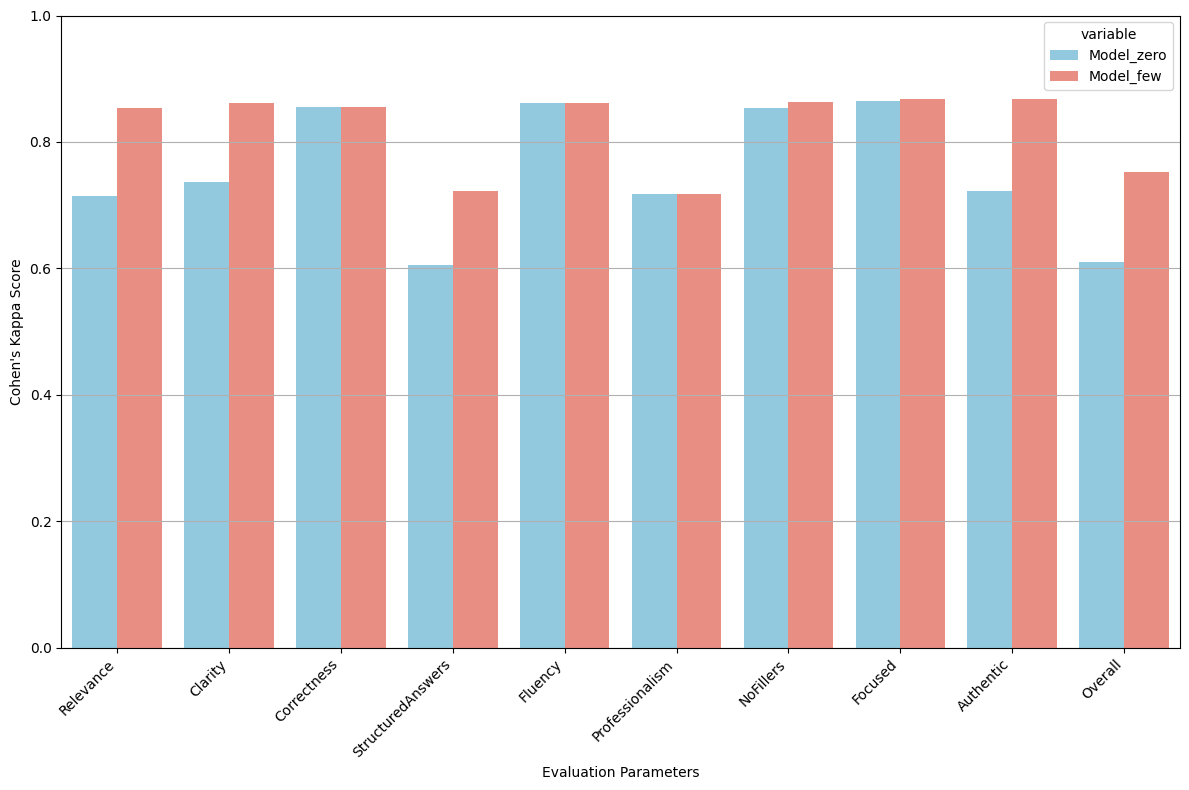

In [ ]:
def calculate_kappa(human, model):
    kappa_scores = {}
    for parameter in human.columns:
        kappa = cohen_kappa_score(human[parameter], model[parameter])
        kappa_scores[parameter] = kappa
    return kappa_scores

# Calculate Kappa scores
kappa_human_model1 = calculate_kappa(human_scores, model_zero)
kappa_human_model2 = calculate_kappa(human_scores, model_few)

# Convert the results to DataFrame for plotting
kappa_df = pd.DataFrame({
    'Parameter': list(kappa_human_model1.keys()),
    'Model_zero': list(kappa_human_model1.values()),
    'Model_few': list(kappa_human_model2.values())
})

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Parameter', y='value', hue='variable', data=pd.melt(kappa_df, ['Parameter']),palette={'Model_zero': 'skyblue', 'Model_few': 'salmon'})

#plt.title('Cohen\'s Kappa Agreement between Human Evaluators and AI Models')
plt.ylabel('Cohen\'s Kappa Score')
plt.xlabel('Evaluation Parameters')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Flatten the scores into a single list for each evaluator
human_flat = human_scores.values.flatten()
ai_flat = model_zero.values.flatten()

# Calculate the overall Cohen's Kappa score
overall_kappa = cohen_kappa_score(human_flat, ai_flat)

# Print the overall Cohen's Kappa score
print(f"Overall Cohen's Kappa for zero shot: {overall_kappa:.3f}")

Overall Cohen's Kappa for zero shot: 0.755


In [ ]:
# Flatten the scores into a single list for each evaluator
human_flat = human_scores.values.flatten()
ai_flat = model_few.values.flatten()

# Calculate the overall Cohen's Kappa score
overall_kappa = cohen_kappa_score(human_flat, ai_flat)

# Print the overall Cohen's Kappa score
print(f"Overall Cohen's Kappa for few shot: {overall_kappa:.3f}")

Overall Cohen's Kappa for few shot: 0.825
